### SMDM - 1.Wholesale Customer Analysis-Project 2.

Student Name:-  Madhu Narayanan

Batch:-  July 2020

Date:- 11.09.2020 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import iqr
import copy
import os

In [2]:
#os.chdir

## Problem 1

### Problem Statement:

#### Wholesale Customers Analysis

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. 

The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).


Lets first download the dataset and understand the shape and size.

In [3]:
df = pd.read_csv('Wholesale Customer.csv')

In [4]:
df.head(5)

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [5]:
df.tail()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125
439,440,Hotel,Other,2787,1698,2510,65,477,52


In [6]:
df.isnull().values.any()

False

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [8]:
df.columns

Index(['Buyer/Spender', 'Channel', 'Region', 'Fresh', 'Milk', 'Grocery',
       'Frozen', 'Detergents_Paper', 'Delicatessen'],
      dtype='object')

In [9]:
wca = df.copy()

In [10]:
wca.drop('Buyer/Spender', axis=1, inplace=True)
wca.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Hotel,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


In [11]:
wca.Region.unique()

array(['Other', 'Lisbon', 'Oporto'], dtype=object)

In [12]:
wca.Channel.unique()

array(['Retail', 'Hotel'], dtype=object)

Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64


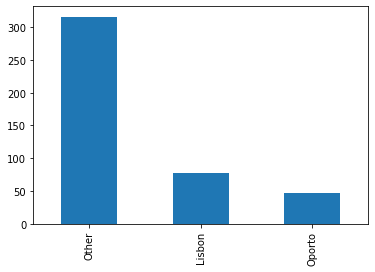

In [13]:
print(wca['Region'].value_counts())
wca['Region'].value_counts().plot(kind='bar');

Hotel     298
Retail    142
Name: Channel, dtype: int64


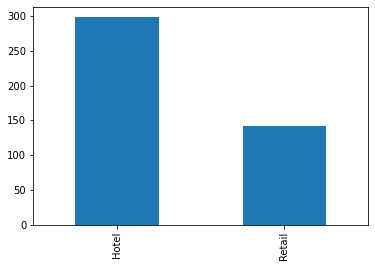

In [14]:
print(wca['Channel'].value_counts())
wca['Channel'].value_counts().plot(kind='bar');

#### Description of variables is as folllows:

FRESH : annual spending on fresh products - (Numerical)    
MILK : annual spending on milk products - (Numerical)       
GROCERY : annual spending on grocery products - (Numerical)   
FROZEN : annual spending on frozen products - (Numerical)      
DETERGENTS_PAPER : annual spending on detergents and paper products - (Numerical)      
DELICATESSEN : annual spending on and delicatessen products - (Numerical)       
CHANNEL : Sales Channel - Hotel or Retail channel - (object/string - Nominal)        
REGION :  Regions in Portugal available from the dataset - Lisnon, Oporto and Other - (object/string - Nominal)     
BUYER/SPENDER : It is the S.No. (Numerical, though Nominal) - Since index is representing the same, we can remove this series from the dataset as it maynot be helpful during analysis.        

The dataset gives data about sales of 6 varieties of products across 3 Regions through 2 Sales Channels by a wholesaler.

Category - Region - total : 440 records. Lisbon-77, Oporto-47 and Other-316 records

Category - Channel -total : 440 records. Hotel-298 & Retail-142 records

The dataset is good to go for analysis part with no null values. From the above we can infer that among the Regions, Other category is higher and among Sales Channel,  Hotel segment contribute more to spends.                    

#### Based on the Problem Statement, lets get into Exploratory Data Analyses

Using methods of descriptive statistics to summarize data:

In [15]:
wca['Sum_of_Spends'] = wca['Fresh'] + wca['Milk'] + wca['Grocery'] + wca['Frozen'] + wca['Detergents_Paper'] + wca['Delicatessen']
wca

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Sum_of_Spends
0,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...
435,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,Hotel,Other,10290,1981,2232,1038,168,2125,17834


Let's now answer the questions required for the Analytics
### 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?

In [16]:
wca.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440,NaN,NaN,NaN,12000.3,12647.3,3,3127.75,8504,16933.8,112151
Milk,440,NaN,NaN,NaN,5796.27,7380.38,55,1533,3627,7190.25,73498
Grocery,440,NaN,NaN,NaN,7951.28,9503.16,3,2153,4755.5,10655.8,92780
Frozen,440,NaN,NaN,NaN,3071.93,4854.67,25,742.25,1526,3554.25,60869
Detergents_Paper,440,NaN,NaN,NaN,2881.49,4767.85,3,256.75,816.5,3922,40827
Delicatessen,440,NaN,NaN,NaN,1524.87,2820.11,3,408.25,965.5,1820.25,47943
Sum_of_Spends,440,NaN,NaN,NaN,33226.1,26356.3,904,17448.8,27492,41307.5,199891


#### The above table gives a five point summary i.e. The Measure of Central Tendency - Mean, Median, mode Measure of Dispersion - Range, IQR, Standard Deviation.  

From the above describe function, we can infer the following

'Channel' has two unique values, with 'Hotel' as most frequent with 298 out of 440 transactions. i.e 67.7% of spending comes from 'Hotel' Channel.

'Region' has three unique values, with 'Other' as most frequent with 316 out of 440 transactions. i.e.71.8% of spending comes from 'Other' region of Portugal.

##### Fresh item (440 records),

has a mean of 12000.3, standard deviation of 12647.3, with min spend of 3 and max spend of 112151 .

The other aspect is Q1(25%) is 3127.75, Q3(75%) is 16933.8, with Q2(50%) 8504

range = (max-min) =(112151-3) = 112,148 & IQR = Q3-Q1 = 16933.8-3127.75 = 13,806.05 (this is helpful in calculating the outlier(1.5 IQR Lower/Upper limit))

##### Milk item (440 records),

has a mean of 5796.27, standard deviation of 7380.38, with min spend of 55 and max spend of 73498.

The other aspect is Q1(25%) is 1533, Q3(75%) is 7190.25, with Q2(50%) 3627

range = (max-min) =(73498-55) = 73443 & IQR = Q3-Q1 = 7190.25-1533 = 5657.25 (this is helpful in calculating the outlier(1.5 IQR Lower/Upper limit))

##### Grocery item (440 records),

has a mean of 7951.28, standard deviation of 9503.16, with min spend of 3 and max spend of 92780.

The other aspect is Q1(25%) is 2153, Q3(75%) is 10655.8, with Q2(50%) 4755.5

range = (max-min) =(92780-3) = 92777 & IQR = Q3-Q1 = 10655.8-2153 = 8502.8 (this is helpful in calculating the outlier(1.5 IQR Lower/Upper limit))

##### Frozen (440 records),

has a mean of 3071.93, standard deviation of 4854.67, with min spend of 25 and max spend of 60869.

The other aspect is Q1(25%) is 742.25, Q3(75%) is 3554.25, with Q2(50%) 1526

range = (max-min) =(60869-25) = 60844 & IQR = Q3-Q1 = 3554.25-742.25 = 2812 (this is helpful in calculating the outlier(1.5 IQR Lower/Upper limit))

##### Detergents_Paper (440 records),

has a mean of 2881.49, standard deviation of 4767.85, with min spend of 3 and max spend of 40827.

The other aspect is Q1(25%) is 256.75, Q3(75%) is 3922, with Q2(50%) 816.5

range = (max-min) =(40827-3) = 40824 & IQR = Q3-Q1 = 3922-256.75 = 3665.25 (this is helpful in calculating the outlier(1.5 IQR Lower/Upper limit))

##### Delicatessen (440 records),

has a mean of 1524.87, standard deviation of 2820.11, with min spend of 3 and max spend of 47943.

The other aspect is Q1(25%) is 408.25, Q3(75%) is 1820.25, with Q2(50%) 965.5

range = (max-min) =(47943-3) = 47940 & IQR = Q3-Q1 = 1820.25-408.25 = 1412 (this is helpful in calculating the outlier(1.5 IQR Lower/Upper limit))

In [17]:
wca.groupby('Region').sum()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Sum_of_Spends
Region,,,,,,,
Lisbon,854833,422454,570037,231026,204136,104327,2386813
Oporto,464721,239144,433274,190132,173311,54506,1555088
Other,3960577,1888759,2495251,930492,890410,512110,10677599


In [18]:
wca.groupby('Channel').sum()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Sum_of_Spends
Channel,,,,,,,
Hotel,4015717,1028614,1180717,1116979,235587,421955,7999569
Retail,1264414,1521743,2317845,234671,1032270,248988,6619931


<Figure size 1512x1008 with 0 Axes>

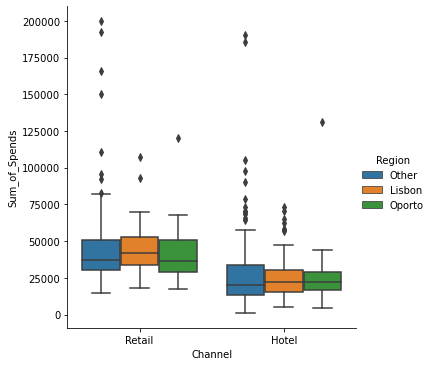

In [19]:
plt.figure(figsize=(21,14))
sns.catplot(x='Channel',y='Sum_of_Spends',hue='Region', data=wca,kind='box');


 a. From the above dataset, Other Region and Hotel Channel seems to spend more. Their total spends are 10677599 & 7999569 respectively. 

 b. The Oporto Region and Retail Channel seems to spend less. Their total spends are 1555088 & 6619931 respectively.

### 1.2. There are 6 different varieties of items are considered. Do all varieties show similar behaviour across Region and Channel?

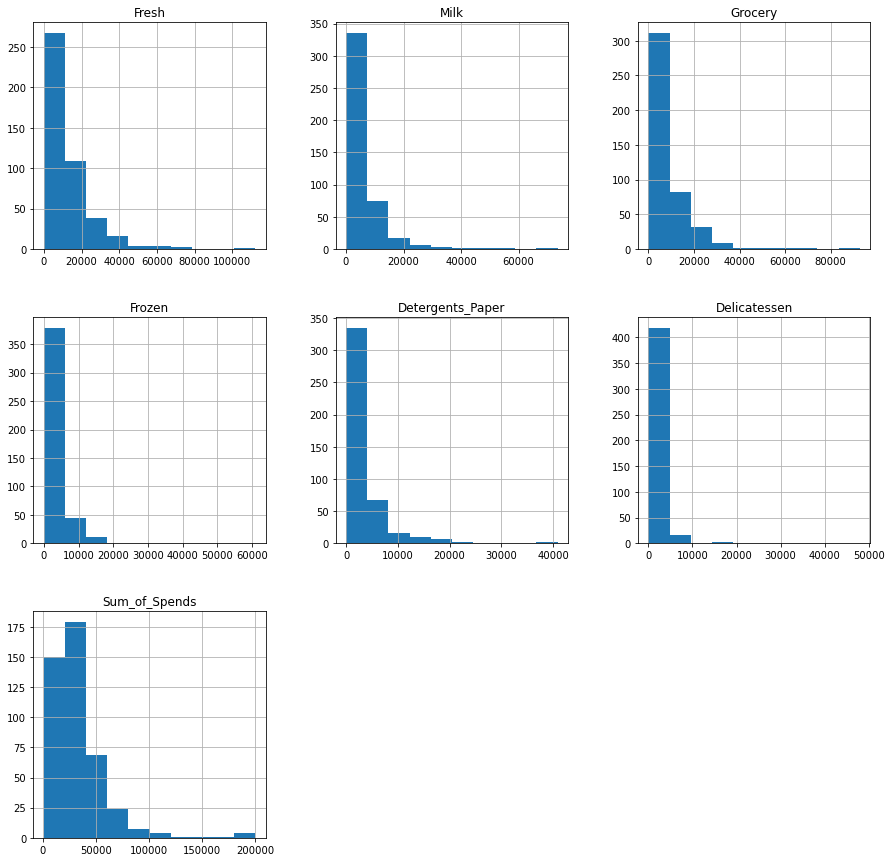

In [20]:
wca.hist(figsize=(15,15));

In [21]:
Skewness = pd.DataFrame({'Skewness':[stats.skew(wca.Fresh),stats.skew(wca.Milk),stats.skew(wca.Grocery),stats.skew(wca.Frozen),stats.skew(wca.Detergents_Paper),stats.skew(wca.Delicatessen)]},
                        index=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'])
Skewness

,Skewness
Fresh,2.552583
Milk,4.039922
Grocery,3.575187
Frozen,5.887826
Detergents_Paper,3.619458
Delicatessen,11.113534


/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 25.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 40.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 36.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 54.7% of the points 

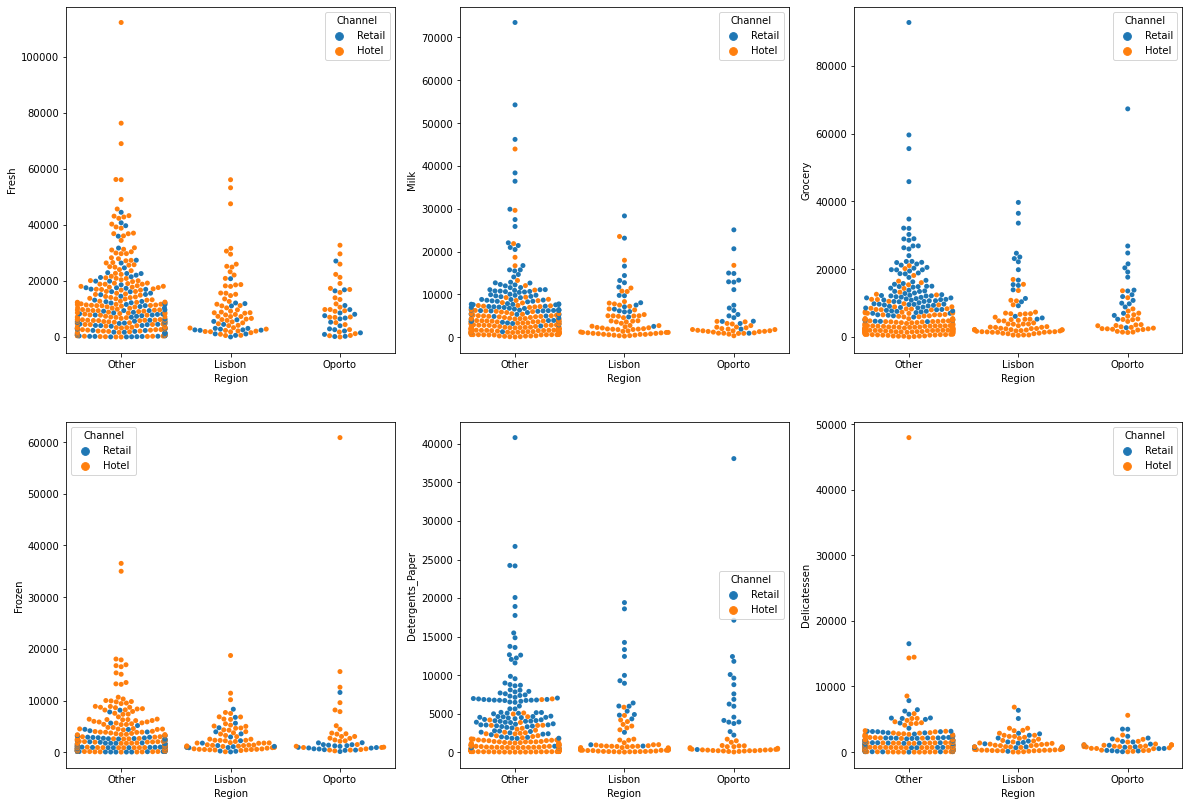

In [22]:
fig, axes = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(20,14)

a = sns.swarmplot(data=wca,x='Region',y='Fresh',hue='Channel',orient = "v" , ax=axes[0][0])

b = sns.swarmplot(data=wca,x='Region', y='Milk',hue='Channel',orient = "v" , ax=axes[0][1])

c = sns.swarmplot(data=wca,x='Region',y='Grocery',hue='Channel',orient = "v" , ax=axes[0][2])

d = sns.swarmplot(data=wca,x='Region',y='Frozen',hue='Channel',orient = "v" , ax=axes[1][0])

e = sns.swarmplot(data=wca,x='Region',y='Detergents_Paper',hue='Channel',orient = "v" , ax=axes[1][1])

f = sns.swarmplot(data=wca,x='Region',y='Delicatessen',hue='Channel',orient = "v" , ax=axes[1][2])



From the above 2 graphs, we can infer that among 6 varieties they are not similar in behaviour across graphically. Distribution is almost similar however the boxplot shows differences also for all the items, they are skewed that is visibly seen both in the histogram and Skewness data.. This will be inconclusive as we need to analyse further using Co-efficient of Variation to understand conclusively about their consistency on behaviours. 

#### 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour

To understand the inconsistency in varieties, we need to check the Coefficient of Variation (Standard Deviation/Mean) for the sample data. We first find Standard Deviation and Mean of all 6 varieties then divide Standard Deviation by Mean to arrive at Co-efficient of Variation values.
Note: Lower the CV, better the consistency and Higher the CV, higher the inconsistency.


In [23]:
sd_items = wca.std() #use standard deviation to check the measure of variabilty
sd_items.round(2)

Fresh               12647.33
Milk                 7380.38
Grocery              9503.16
Frozen               4854.67
Detergents_Paper     4767.85
Delicatessen         2820.11
Sum_of_Spends       26356.30
dtype: float64

In [24]:
cv_Fresh = np.std(wca['Fresh'])/np.mean(wca['Fresh'])
print('CV of Fresh is =',cv_Fresh)
cv_Milk = np.std(wca['Milk'])/np.mean(wca['Milk'])
print('CV of Milk is =',cv_Milk)
cv_Grocery = np.std(wca['Grocery'])/np.mean(wca['Grocery'])
print('CV of Grocery is =',cv_Grocery)
cv_Frozen = np.std(wca['Frozen'])/np.mean(wca['Frozen'])
print('CV of Frozen is =', cv_Frozen)
cv_DP = np.std(wca['Detergents_Paper'])/np.mean(wca['Detergents_Paper'])
print('CV of Detergents_Paper is =', cv_DP)
cv_Delic = np.std(wca['Delicatessen'])/np.mean(wca['Delicatessen'])
print('CV of Delicatessen is =', cv_Delic)

CV of Fresh is = 1.0527196084948245
CV of Milk is = 1.2718508307424503
CV of Grocery is = 1.193815447749267
CV of Frozen is = 1.5785355298607762
CV of Detergents_Paper is = 1.6527657881041729
CV of Delicatessen is = 1.8473041039189306


From the data revealed on consistency on behaviour of Items after calculation of CV is that:
“Fresh” item have lowest Co-efficient of Variation hence it can be inferred that is least inconsistent.
“Delicatessen” item have highest coefficient of Variation, hence it can be inferred that is most inconsistent.


While we have tried understand the consistencies/inconsistencies of behaviour on items which is Relative dispersion we shall also try to understand their relation using correlation. For this we shall use both Pairplot and Heatmap('Pearson's Correlation) to understand the relation between items.

<Figure size 1080x1080 with 0 Axes>

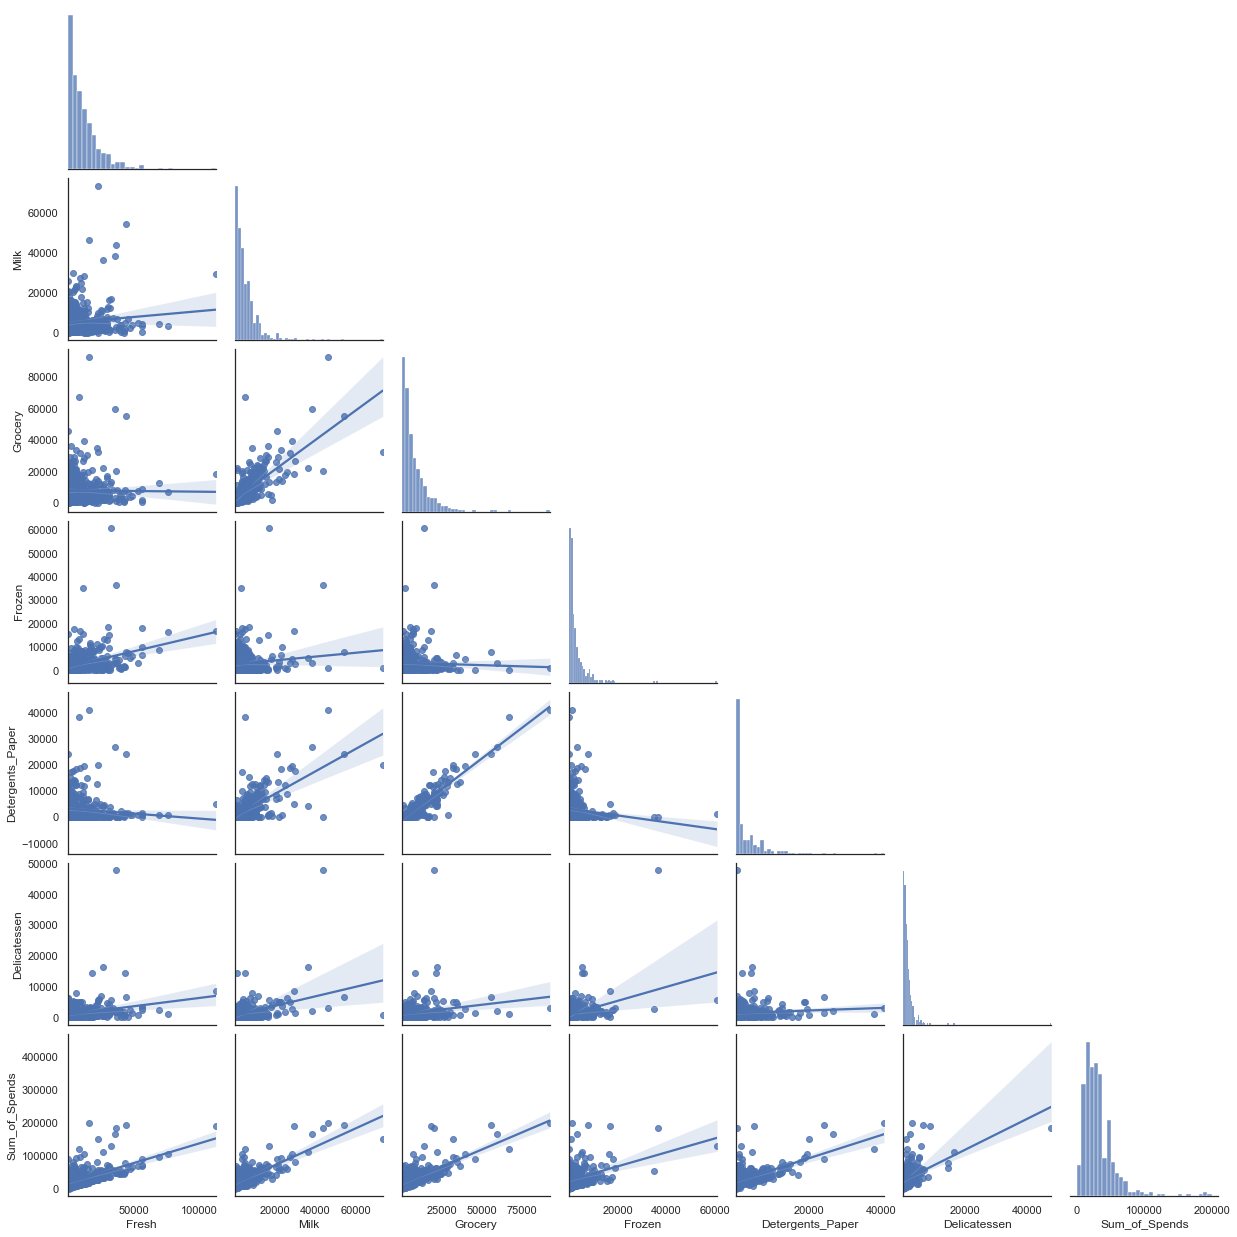

In [25]:
plt.figure(figsize=(15,15))
sns.set(style='white',color_codes='deep');
sns.pairplot(wca,corner=True,kind='reg');

From the pairplot above, the correlation between the 'Detergents_Paper' and 'Grocery' seems to be pretty strong, meaning that consumers would spend money on these two types of product more regularly. Also 'Milk', 'Grocery' contribute high to the Total Spends (Sum_of_Spends) basically indicating as essential items. The correlation of these would give better clarity in revealing the same. Heat map can be used for the same which is Pearson's correlation:

In [26]:
corr = wca.corr()
corr

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Sum_of_Spends
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690,0.575178
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368,0.776909
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497,0.740680
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947,0.388436
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291,0.633882
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000,0.496849
Sum_of_Spends,0.575178,0.776909,0.740680,0.388436,0.633882,0.496849,1.000000


In [27]:
corr = wca.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

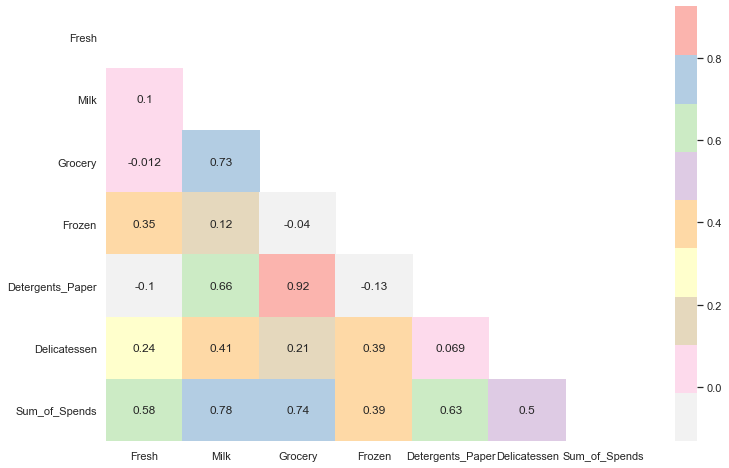

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,mask=mask,cmap='Pastel1_r');

The correlation between the 'Detergents_Paper' and 'Grocery' is strong (0.92). This can be inferred that whenever customers buy Detergents_Paper, they are highly likely to buy 'Grocery' too.

Also 'Milk', 'Grocery' contribute high to the Total Spends(Sum_of_Spends) with a higher correlation of (0.78) & (0.74) respectively. This can be inferred that whenever customers buy they are highly likely to buy 'Milk' & 'Grocery' more often than others.

#### 1.4 Are there any outliers in the data?

The boxplot which is a five point summary (IQR) can be presented to find the outliers.

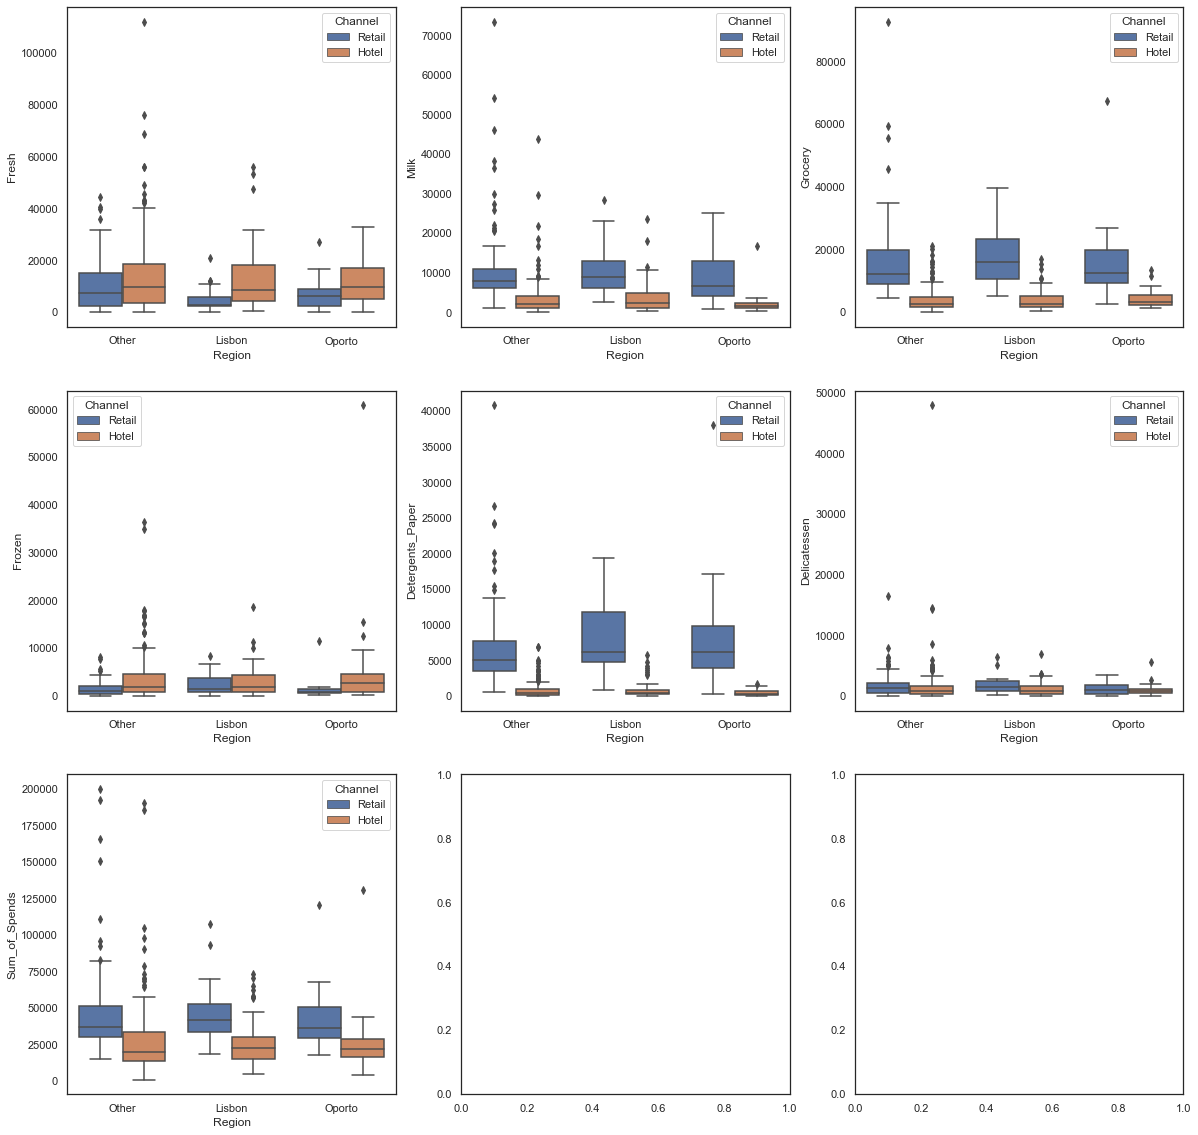

In [29]:
fig, axes = plt.subplots(nrows=3,ncols=3)
fig.set_size_inches(20, 20)

a = sns.boxplot(data=wca,x='Region',y='Fresh',hue='Channel',orient = "v" , ax=axes[0][0])

b = sns.boxplot(data=wca,x='Region', y='Milk',hue='Channel',orient = "v" , ax=axes[0][1])

c = sns.boxplot(data=wca,x='Region',y='Grocery',hue='Channel',orient = "v" , ax=axes[0][2])

d = sns.boxplot(data=wca,x='Region',y='Frozen',hue='Channel',orient = "v" , ax=axes[1][0])

e = sns.boxplot(data=wca,x='Region',y='Detergents_Paper',hue='Channel',orient = "v" , ax=axes[1][1])

f = sns.boxplot(data=wca,x='Region',y='Delicatessen',hue='Channel',orient = "v" , ax=axes[1][2])

g = sns.boxplot(x='Region',y='Sum_of_Spends',hue='Channel', data=wca, ax=axes[2][0])



In [30]:
print('IQR of Fresh            ' + str(iqr(wca['Fresh'])))
print('IQR of Milk             ' + str(iqr(wca['Milk'])))
print('IQR of Grocery          ' + str(iqr(wca['Grocery'])))
print('IQR of Frozen           ' + str(iqr(wca['Frozen'])))
print('IQR of Detergents_Paper ' + str(iqr(wca['Detergents_Paper'])))
print('IQR of Delicatessen     ' + str(iqr(wca['Delicatessen'])))

IQR of Fresh            13806.0
IQR of Milk             5657.25
IQR of Grocery          8502.75
IQR of Frozen           2812.0
IQR of Detergents_Paper 3665.25
IQR of Delicatessen     1412.0


The rule is values >1.5 times of Q3(75%)-Upper bound and <1.5 times of Q1(25%- Lower bound are outliers.

Let's Calculate the IQR values (Q1 - 25%) and (Q3-75%)

In [31]:
fr_quartile1, fr_quartile2 = np.percentile(wca.Fresh,[25,75])
print('Fresh:-             Q1:',fr_quartile1,'   Q3:',fr_quartile2)
mi_quartile1, mi_quartile2 = np.percentile(wca.Milk,[25,75])
print('Milk:-              Q1:',mi_quartile1,'    Q3:',mi_quartile2)
gr_quartile1, gr_quartile2 = np.percentile(wca.Grocery,[25,75])
print('Grocery:-           Q1:',gr_quartile1,'    Q3:',gr_quartile2)
fro_quartile1, fro_quartile2 = np.percentile(wca.Frozen,[25,75])
print('Frozen:-            Q1:',fro_quartile1,'    Q3:',fro_quartile2)
dp_quartile1, dp_quartile2 = np.percentile(wca.Detergents_Paper,[25,75])
print('Detergents_Paper:-  Q1:',dp_quartile1,'    Q3:',dp_quartile2)
del_quartile1, del_quartile2 = np.percentile(wca.Delicatessen,[25,75])
print('Delicatessen:-      Q1:',del_quartile1,'    Q3:',del_quartile2)

Fresh:-             Q1: 3127.75    Q3: 16933.75
Milk:-              Q1: 1533.0     Q3: 7190.25
Grocery:-           Q1: 2153.0     Q3: 10655.75
Frozen:-            Q1: 742.25     Q3: 3554.25
Detergents_Paper:-  Q1: 256.75     Q3: 3922.0
Delicatessen:-      Q1: 408.25     Q3: 1820.25


In [32]:
fr_iqr = (fr_quartile2-fr_quartile1)
print('Fresh:-            IQR is :-',fr_iqr)
mi_iqr = (mi_quartile2-mi_quartile1)
print('Milk:-             IQR is :-',mi_iqr)
gr_iqr = (gr_quartile2-gr_quartile1)
print('Grocery:-          IQR is :-',gr_iqr)
fro_iqr = (fro_quartile2-fro_quartile1)
print('Frozen:-           IQR is :-',fro_iqr)
dp_iqr = (dp_quartile2-dp_quartile1)
print('Detergents_Paper:- IQR is :-',dp_iqr)
del_iqr = (del_quartile2-del_quartile1)
print('Delicatessen:-     IQR is :-',del_iqr)

Fresh:-            IQR is :- 13806.0
Milk:-             IQR is :- 5657.25
Grocery:-          IQR is :- 8502.75
Frozen:-           IQR is :- 2812.0
Detergents_Paper:- IQR is :- 3665.25
Delicatessen:-     IQR is :- 1412.0


Having got the Q1, Q3 & IQR let's calculate the lower bound and upper bound values

In [33]:
print('Fresh:-                 lower bound value is:',fr_quartile1-(1.5*fr_iqr),'   upper bound value is:',fr_quartile2+(1.5*fr_iqr))
print('Milk:-                  lower bound value is:',mi_quartile1-(1.5*mi_iqr),'   upper bound value is:',mi_quartile2+(1.5*mi_iqr))
print('Grocery:-               lower bound value is:',gr_quartile1-(1.5*gr_iqr),'  upper bound value is:',gr_quartile2+(1.5*gr_iqr))
print('Frozen:-                lower bound value is:',fro_quartile1-(1.5*fro_iqr),'    upper bound value is:',fro_quartile2+(1.5*fro_iqr))
print('Detergents_Paper:-      lower bound value is:',dp_quartile1-(1.5*dp_iqr),'   upper bound value is:',dp_quartile2+(1.5*dp_iqr))
print('Delicatessen:-          lower bound value is:',del_quartile1-(1.5*del_iqr),'    upper bound value is:',del_quartile2+(1.5*del_iqr))

Fresh:-                 lower bound value is: -17581.25    upper bound value is: 37642.75
Milk:-                  lower bound value is: -6952.875    upper bound value is: 15676.125
Grocery:-               lower bound value is: -10601.125   upper bound value is: 23409.875
Frozen:-                lower bound value is: -3475.75     upper bound value is: 7772.25
Detergents_Paper:-      lower bound value is: -5241.125    upper bound value is: 9419.875
Delicatessen:-          lower bound value is: -1709.75     upper bound value is: 3938.25


##### Key Observations from five-point summary graph (IQR - boxplot) and resulting in outlier calculation using IQR & lower/upper bound values:   

From the above graph we can clearly see that outliers are present for Other region predominantly across every item or variety.

If we dissect the presence of outliers Region wise and Channel wise and thereafter calculate IQR and outlier limits item-wise,we find the following:

Fresh: Other Region has more outliers across both channels of Hotel and Retail followed by Lisbon Region. In Oporto region there are no outliers in Hotel category. lower bound value is: -17581.25    upper bound value is: 37642.75 which should be the cut-off for outliers to impact i.e. values lesser than lower bound and higher than upper bound are clearly outliers. 

Milk: Other Region has more outliers followed by Lisbon. Oporto has no or negligible outlier presence. lower bound value is: -6952.875    upper bound value is: 15676.125 which should be the cut-off for outliers to impact i.e. values lesser than lower bound and higher than upper bound are clearly outliers. 

Grocery: Other Region is the one which has got outliers across both the Channels followed by Lisbon Region but only in Hotel Channel. For Grocery across all Regions, Hotel Channel has presence of outliers more. lower bound value is: -10601.125   upper bound value is: 23409.875 which should be the cut-off for outliers to impact i.e. values lesser than lower bound and higher than upper bound are clearly outliers.

Frozen: Other Region has more outliers followed by Lisbon and Oporto.lower bound value is: -3475.75     upper bound value is: 7772.25 which should be the cut-off for outliers to impact i.e. values lesser than lower bound and higher than upper bound are clearly outliers. 

Detergents_Paper: Other Region has got higher outliers' presence. Lisbon Region has presence of outliers only in Hotel Channel. Oporto has no or negligible outlier presence. lower bound value is: -5241.125    upper bound value is: 9419.875 which should be the cut-off for outliers to impact i.e. values lesser than lower bound and higher than upper bound are clearly outliers. 

Delicatessen: Other Region has more outliers followed by Lisbon and Oporto.lower bound value is: -1709.75     upper bound value is: 3938.25 which should be the cut-off for outliers to impact i.e. values lesser than lower bound and higher than upper bound are clearly outliers.  



#### Inference from five-point summary plot: 
The inference is outliers should not be ignored rather treat them separate as these could be seasonal or occasional bulk purchasers especially from the Hotel Channel. Since we do not have records of time (Month, year) in our data, we cannot conclude the reason for these outliers.

However these could be seasonal or occasional events in those region that will impact the sales. If more data on the time of purchase can be included for analyses, this can reveal the trend for the claim made. This would be a feedback to the team that generates data.

1.5 On the basis of this report, what are the recommendations?

1. The Oporto Region needs more attention and focus to improve the spends. Similarly, Retail Channel requires enablers to improve spends.
2. The Other Region though shows as major contributor to spends, it would be suggested to split the regions further and asses the Region- wise contribution.
3. From the given dataset, trends cannot be analyzed as there is no time-based data such as monthly, quarterly or yearly. This will help us in building up better stock plan as well spend plan based on analyzing whether the spend is seasonal or regular. Also spend pattern by the Channel can be well assessed to make better forecasting models.
4. The data pipeline has to be streamlined to capture time of purchase, splitting Other regions further as well to create buckets/baskets.
5. Outliers should not be ignored or eliminated, instead to be created under specific buckets. This will help in better retention of top customers and irregular/lower part of outliers can be given focused plans to improve their regularity in spends.
6. Since the correlation between Detergents_Paper – Grocery & Grocer-Milk is higher, running combo offers of all 3 items of ‘Milk, Grocery and Detergents_Paper will ensure incremental spends on these items.


        --------------------------------------- End of Report -------------------------------------------------